In [2]:
#some imports
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
#to download file
import urllib.request
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Solutions to Modern Data Science Problems (probelms till 27.11)
by *Mateusz Kmieć* 

### Problem 28. 

We want to use the KNN algorithm for the classification problem. We consider a
training sample of N=106 points, which are distributed approximately uniformly on the
available feature space . Calculate the mean distance between neighbors assuming:


• The feature space is 1-D X =[X1
] X1 in the range of [0,1]
 
 
• The feature space is 2-D X =[X1
,X2 ] Xi in the range of [0,1] 


• The feature space is 3-D X =[X1
,X2 , X3 ] Xi in the range of [0,1]


• The feature space is 10-D X =[X1
,X2 , X3 ,…, X10 ] Xi in the range of [0,1]


• How many points do we need for 10-D feature space to keep the same distance
between the neighbors as in the first case ?

In [51]:
def distance(x,y):
    xx=np.array(x)
    yy=np.array(y)
    return np.sqrt(np.sum(np.square(xx-yy)))


def mean_distance(x, metric=distance):    
    distances=np.array([distance(x[2*i],x[2*i+1]) for i in range(int(x.size*0.5))])
    return np.mean(distances)

 
X1=np.arange(0,1,1/106)               #1-D N=106
print("Mean distance for 1-D feature space:  {:.4f} = 1/106.".format(mean_distance(X1)))


xx2=np.arange(0,1,1/np.sqrt(106))     #2-D N=sqrt(106)*sqrt(106)=106
X2=np.array(xx2)

print("Mean distance for 2-D feature space:  {:.4f} = 1/sqrt(106).".format(mean_distance(X2)))


xx3=np.arange(0,1,1/pow(106,1/3))     #3-D N=((106)^{1/3})^{3}=106
X3=np.array(xx3)

print("Mean distance for 3-D feature space:  {:.4f} = 1/(106)^(1/3).".format(mean_distance(X3)))


xx10=np.arange(0,1,1/pow(106,1/10))     #10-D N=((106)^{1/10})^{10}=106
X10=np.array(xx10)

print("Mean distance for 10-D feature space: {:.4f} = 1/(106)^(1/10).".format(mean_distance(X10)))

print("\nNaturally, in the case of 10-D feature space we would need (106)^10 points\nto have the same average distance between points as for 1-D.")

Mean distance for 1-D feature space:  0.0094 = 1/106.
Mean distance for 2-D feature space:  0.0971 = 1/sqrt(106).
Mean distance for 3-D feature space:  0.2113 = 1/(106)^(1/3).
Mean distance for 10-D feature space: 0.6273 = 1/(106)^(1/10).

Naturally, in the case of 10-D feature space we would need (106)^10 points
to have the same average distance between points as for 1-D.


### Probelm 29. 

Derive OLS solution for simple linear regression model 

(1) $$f_{\bar{\theta}}(x_{i}) = \bar{\theta}_{1}x_{i}+\bar{\theta}_{0},$$

where $i$ is the data pont index and $\bar{\theta}$ is the following vector:

(2) $$\bar{\theta}=\left[\theta_{0},\theta_{1}\right].$$

Consequently we can write (1) as:

(3) $$f_{\bar{\theta}}(X)=\bar{\theta}^{T}.X=X^{T}.\bar{\theta},$$

where

(3) $$X=\begin{bmatrix}
    \mathbb{1} \\
    x_{i}
\end{bmatrix}.$$

First let us assume that the cost functino is:

(4) $$L(f_{\bar{\theta}}(X),Y)=\left(f_{\bar{\theta}}(X)-Y\right)^{2}.$$

The cost function can be written as:

(5) $$E_{T}\left(L(f_{\bar{\theta}}(X),Y)\right)=\frac{1}{N}\sum_{i}^{N}\left(f_{\bar{\theta}}(x_{i})-y_{i}\right)^{2},$$

Given (1), the above equation can be written in the form:
    
(6) $$E_{T}\left(L(f_{\bar{\theta}}(X),Y)\right)=\frac{1}{N}\sum_{i}^{N}\left((\bar{\theta}_{1}x_{i} + \bar{\theta}_{0})-y_{i}\right)^{2}.$$

Now we can write equation (6) in a concise form:
    
(7) $$E_{T}\left(L(f_{\bar{\theta}}(X),Y)\right)=\frac{1}{N}\left(X.\bar{\theta}-Y\right)^{T}\left(Y-X.\bar{\theta}\right).$$    

The OLS solution to linear regression problem can be obtained as from the optimization of the cost function $E_{T}$ with respect to $\bar{\theta}$:
    
(8) $$\nabla_{\bar{\theta}} E_{T}\left(L(f_{\bar{\theta}}(X),Y)\right)=0.$$

The gradient of the cost function can be expressed as:
    
(9) $$\nabla_{\bar{\theta}} E_{T}\left(L(f_{\bar{\theta}}(X),Y)\right)=\frac{1}{N} 2X^{T}\left(X.\theta-Y\right)=0.$$  

Which can be solved analitically in a closed form:
    
(10) $$\bar{\theta}=\left(X^{T}.X\right)^{-1}X^{T}Y.$$

In [123]:
0#Linear regression analitically
xx = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
x = np.asmatrix(np.c_[np.ones((15,1)),xx])

y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

theta = np.linalg.inv(x.T*x)*x.T*y
error=(((x@theta-y).T)@(x@theta-y))*(1/y.shape[0])
print("---------------------------------------------") 
print("ANALYTICAL SOLUTION")
print("theta:\n {}\n".format(theta))
print("intercept: {:.4g}\n".format(theta[0,0]))
print("slope: {:.4g}\n".format(theta[1,0]))
print("Error (cost function): {:.4g}\n".format(error[0,0]))


#Linear regression sklearn.
model = LinearRegression()
model = LinearRegression().fit(xx, y)
y_pred = model.predict(xx)
y_true = y

print("\n\n---------------------------------------------")
print("SKLEARN SOLUTION")
print("\nintercept: {}.".format(model.intercept_[0]))
print("\nslope: {}.".format(model.coef_[0,0]))
print('\nError (cost function): {:.4g}'.format(mean_squared_error(y_true,y_pred)))


---------------------------------------------
ANALYTICAL SOLUTION
theta:
 [[-180.92401772]
 [   1.61814247]]

intercept: -180.9

slope: 1.618

Error (cost function): 372.3



---------------------------------------------
SKLEARN SOLUTION

intercept: -180.9240177163372.

slope: 1.6181424688789716.

Error (cost function): 372.3


### Problem 30.

Download the data file from:
    
http://koza.if.uj.edu.pl/~krzemien/machine_learning2021/materials/datasets/data1.csv
    
and write a program that for every dataset separately calculates:

• E[X], E[Y],

• Var(X), Var(Y),

• Cov(X,Y)

• Pearson correlation coefficients

Visualize the data (X vs Y). Visualize the means and variances for all datasets (e.g. E[X]
vs dataset number) 

Notebook:
https://github.com/wkrzemien/dataScienceAndML2020/blob/master/notebooks/intro/simple_load_data.ipynb

In [19]:
url='http://koza.if.uj.edu.pl/~krzemien/machine_learning2021/materials/datasets/data1.csv'
urllib.request.urlretrieve(url,'data1.csv')

('data1.csv', <http.client.HTTPMessage at 0x7f32882d3160>)

In [20]:
input_file = 'data1.csv'

In [21]:
data = pd.read_csv(input_file)

In [22]:
data.head()

,x,y,dataSet
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0


In [23]:
data.dtypes

x            int64
y          float64
dataSet      int64
dtype: object

In [24]:
print(data.columns.values)

['x' 'y' 'dataSet']


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        44 non-null     int64  
 1   y        44 non-null     float64
 2   dataSet  44 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


In [26]:
data.describe()

,x,y,dataSet
count,44.000000,44.000000,44.00000
mean,9.000000,7.500682,1.50000
std,3.198837,1.958925,1.13096
min,4.000000,3.100000,0.00000
25%,7.000000,6.117500,0.75000
50%,8.000000,7.520000,1.50000
75%,11.000000,8.747500,2.25000
max,19.000000,12.740000,3.00000


In [27]:
data[data['dataSet']==0].count()

x          11
y          11
dataSet    11
dtype: int64

In [28]:
data.count()

x          44
y          44
dataSet    44
dtype: int64

In [29]:
data[['y','dataSet']].groupby(['dataSet'],as_index=False).mean().sort_values(by='dataSet')

,dataSet,y
0,0,7.500909
1,1,7.500909
2,2,7.500000
3,3,7.500909


In [30]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

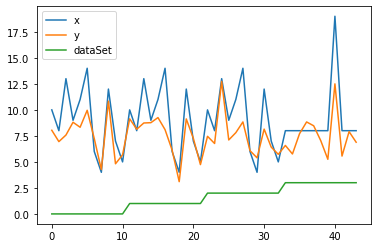

In [31]:
data.plot()

<AxesSubplot:xlabel='x'>

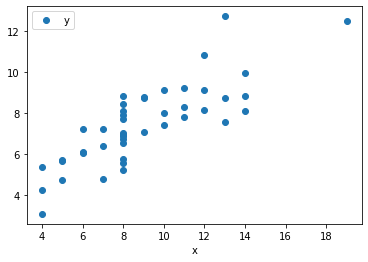

In [32]:
data.plot(x='x', y='y', style='o')